In [2]:
from guppy import hpy # for profiling memory

import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
from pylab import *
from scipy.integrate import simps
from scipy.interpolate import interp1d
from scipy.linalg import eig, det, inv, solve
from scipy.stats import skewnorm, t
from matplotlib import gridspec, lines, ticker
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import itertools as it
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.axisartist as AA
from sys import exit
#from brokenaxes import brokenaxes

max dldp @ p = 0.2500
max dqdy @ p = 0.2500
 max ddpS @ p = 0.2500
htemp1 not defined


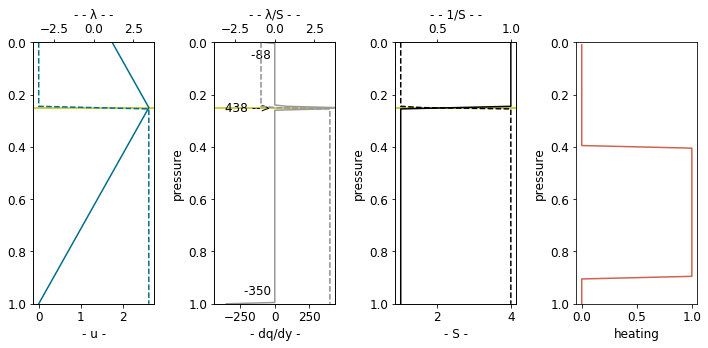

In [4]:
# *****************************************************************************
# -----------------------------------------------------------------------------
#
# NUMERICAL COMPUTATION OF THE OMEGA EQUATION AND THE PV EQUATION
# with the inclusion of diabatic heating
#
# combining
# * Mak (1994) - the effect of latent heating (warm cloud layer with liquid water)
# * Mak (1998) - the effect of surface sensible heat fluxes
#
# also including
# * the effect of low-level latent cooling (e.g. evaporation)
#   status: ok
# * tropopause/stratosphere effects
#   status: soon ok
# * the effect of a cold cloud layer (with ice, above warm clouds)
#   status: in progress
# * frictional effects
#   status: in progress
# * the beta effect
#   status: in progress
#
# by Kristine Flacké Haualand,
# updated December 2019
#
# -----------------------------------------------------------------------------
# *****************************************************************************

# default precision: double (64 bits)
# - float64 for float numbers
# - complex128 for complex numbers:
#   64 bits for the real and 64 bits for the imaginary component

%run -i 'input_variables.py'
%run -i 'plotting_settings.py'
check_wind_and_heating()

NameError: name 'lamstrat_sharp' is not defined

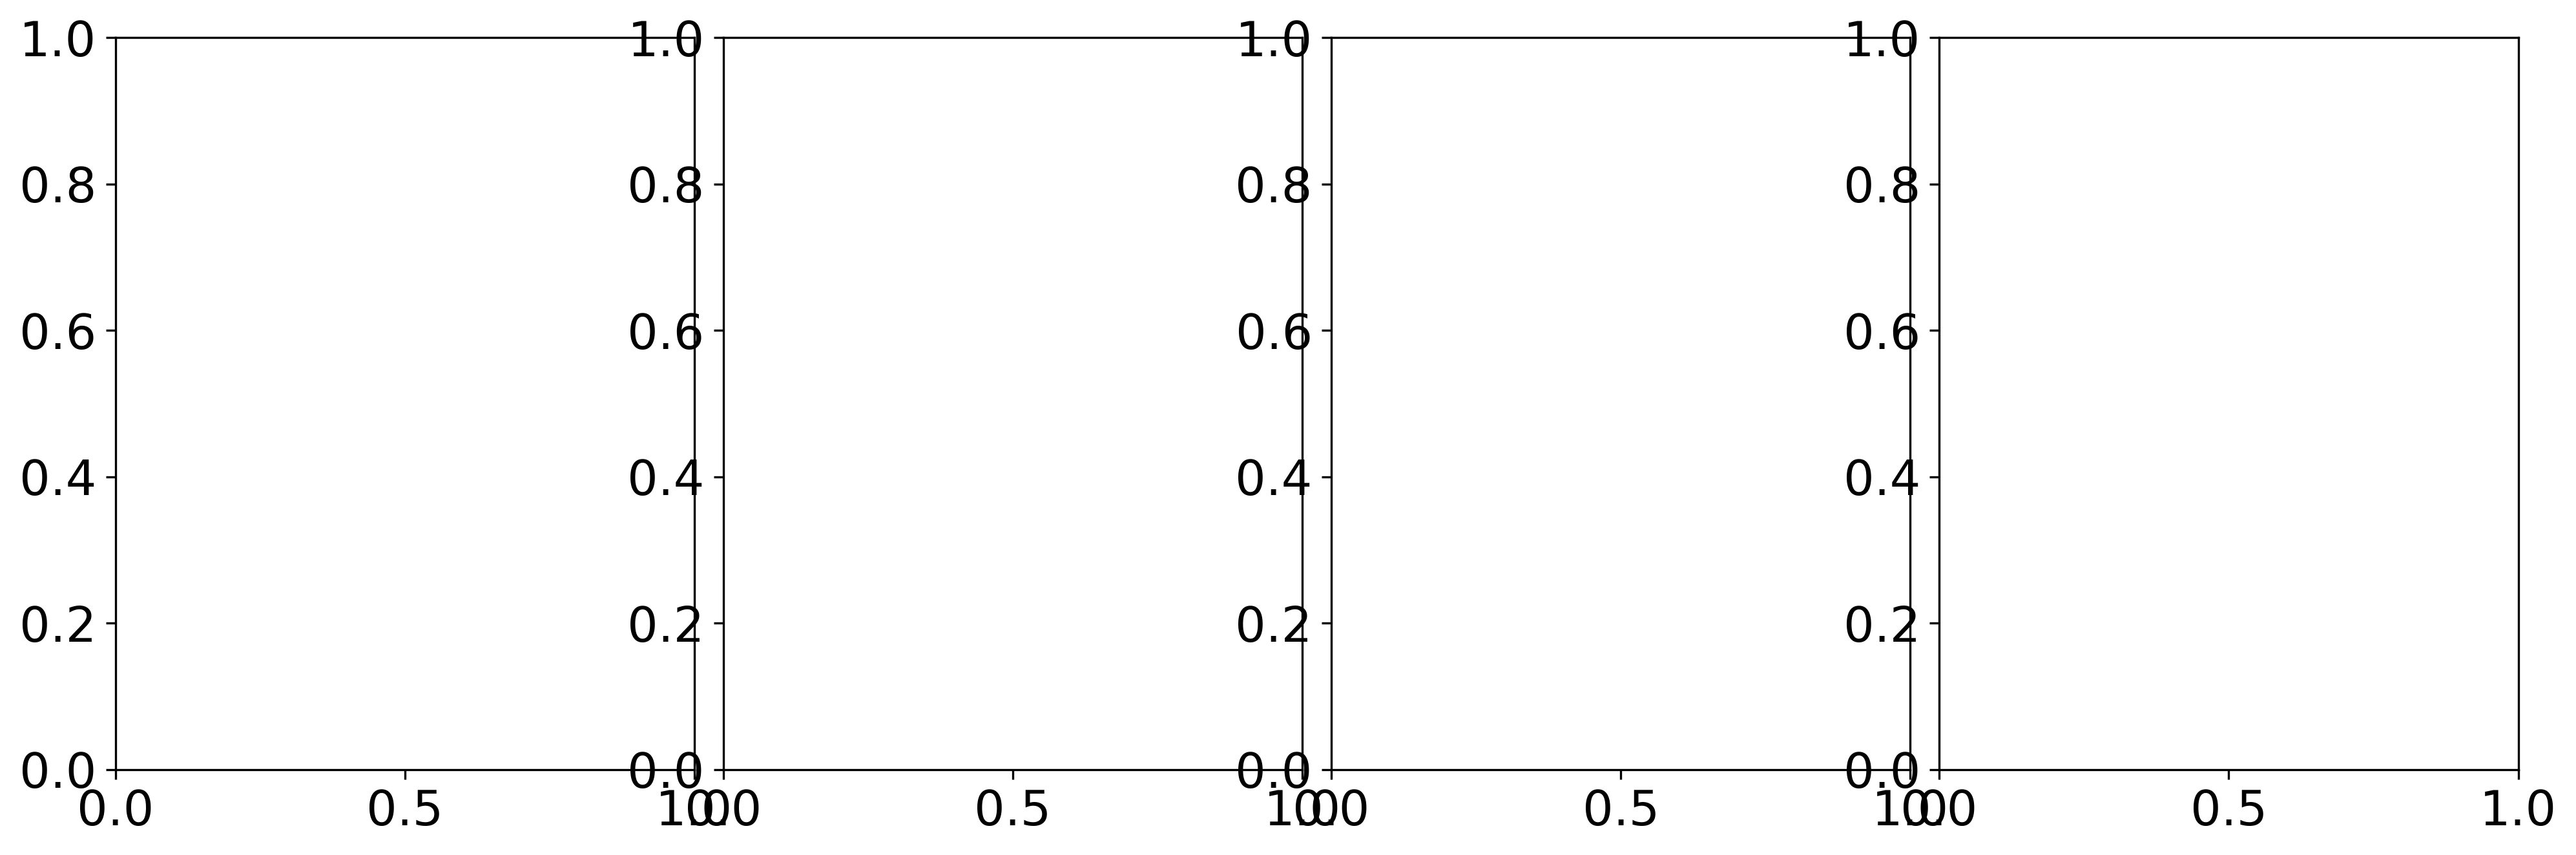

In [39]:
#lamstrat_sharp=lamstrat
#dqdy_sharp = dqdy
#lambda_sharp=lambda1_disc[:nrws]
#S_sharp = S_disc[:nrws]
#lamstrat_smooth=lamstrat
#dqdy_smooth = dqdy
#lambda_smooth=lambda1[:nrws]
#S_smooth = S[:nrws]
#lamstrat_strongsmooth=lamstrat
#dqdy_strongsmooth = dqdy
#lambda_strongsmooth=lambda1[:nrws]
#S_strongsmooth = S[:nrws]
#lamstrat_weaksmooth=lamstrat
#dqdy_weaksmooth = dqdy
#lambda_weaksmooth=lambda1[:nrws]
#S_weaksmooth = S[:nrws]
#lamstrat_high=lamstrat
#dqdy_high = dqdy
#lambda_high=lambda1[:nrws]
#S_high = S[:nrws]
#lamstrat_low=lamstrat
#dqdy_low = dqdy
#lambda_low=lambda1[:nrws]
#S_low = S[:nrws]
#lamstrat_NC=lamstrat
#dqdy_NC = dqdy
#lambda_NC=lambda1[:nrws]
#S_NC = S[:nrws]


mpl.rc('font',size=18)
fig, (ax3,ax4,ax1,ax2) = plt.subplots(1,4,figsize=(16,5),dpi=300)
plt.subplots_adjust(wspace=.05)
#ax1 = ax.twiny()

#ax1.axvline(0,c='k',ls='--',lw=1)
ax1.plot(lamstrat_sharp[:nrws],p[:nrws],c='k',ls='-',lw=2)
ax2.plot(-dqdy_sharp[1:nrws-1]/dqdy_disc[-1],p[1:nrws-1],c='k',ls='-',lw=2) 
ax3.plot(lambda_sharp,p[:nrws],c='k',ls='-',lw=2)
ax4.plot(S_sharp,p[:nrws],c='k',ls='-',lw=2) 
ax1.plot(lamstrat_smooth[:nrws],p[:nrws],c=c_greys[0],ls='-',lw=2)
ax2.plot(-dqdy_smooth[1:nrws-1]/dqdy_disc[-1],p[1:nrws-1],c=c_greys[0],lw=2)
ax3.plot(lambda_smooth,p[:nrws],c=c_greys[0],ls='-',lw=2)
ax4.plot(S_smooth,p[:nrws],c=c_greys[0],ls='-',lw=2)  
ax1.plot(lamstrat_NC[:nrws],p[:nrws],c=c_greys[0],ls='--',lw=2)
ax2.plot(-dqdy_NC[1:nrws-1]/dqdy_disc[-1],p[1:nrws-1],c=c_greys[0],ls='--',lw=2)
ax3.plot(lambda_NC,p[:nrws],c=c_greys[0],ls='--',lw=2)
ax4.plot(S_NC,p[:nrws],c=c_greys[0],ls='--',lw=2)  
ax1.plot(lamstrat_weaksmooth[:nrws],p[:nrws],c=c_blues[1],ls='-',lw=2)
ax2.plot(-dqdy_weaksmooth[1:nrws-1]/dqdy_disc[-1],p[1:nrws-1],c=c_blues[1],lw=2) 
ax3.plot(lambda_weaksmooth,p[:nrws],c=c_blues[1],ls='-',lw=2)
ax4.plot(S_weaksmooth,p[:nrws],c=c_blues[1],ls='-',lw=2) 
#ax1.plot(lamstrat_strongsmooth[:nrws],p[:nrws],c=c_blues[1],ls='-')
#ax2.plot(-dqdy_strongsmooth[1:nrws-1]/dqdy_disc[-1],p[1:nrws-1],c=c_blues[1]) 
ax1.plot(lamstrat_low[:nrws],p[:nrws],c=c_reds[1],ls='-',lw=2)
ax2.plot(-dqdy_low[1:nrws-1]/dqdy_disc[-1],p[1:nrws-1],c=c_reds[1],lw=2) 
ax3.plot(lambda_low,p[:nrws],c=c_reds[1],ls='-',lw=2)
ax4.plot(S_low,p[:nrws],c=c_reds[1],ls='-',lw=2) 

ax4.plot((),(),c='k',lw=2,label='sharp')
ax4.plot((),(),c=c_greys[0],lw=2,label='smooth CONS')
ax4.plot((),(),c=c_greys[0],lw=2,ls='--',label='smooth NCONS-70')
ax4.plot((),(),c=c_blues[1],lw=2,label='smooth shallow')
ax4.plot((),(),c=c_reds[1],lw=2,label='smooth low')

ax1.set_xlabel('$\\regular{\lambda/S}$ \n$\\regular{(s \; hPa \; m^{-1})}$')
#ax1.set_xlim(-1.1*np.max(lamstrat),1.1*np.max(lamstrat))
ax2.set_xlabel('$\\regular{-[d\overline{q}/dy] \; / \; [d\overline{q}/dy]_{surf}}$')#'$\\regular{d\overline{q}/dy}$')
ax2.set_xlim(-.1,1.3)#np.max(np.abs(dqdy_weaksmooth)),np.max(np.abs(dqdy_weaksmooth)))
ax2.set_xticks([0,.5,1])
ax3.set_xlabel('$\\regular{\lambda}$ \n$\\regular{(\\times 10^{-2} \; m \; s^{-1} \; hPa^{-1})}$')
ax4.set_xlabel('$\\regular{S}$ \n$\\regular{(\\times 10^{-2} \; m^2 \; s^{-2} \; hPa^{-2})}$')
ax1.set_yticks([0,.2,.25,.3,.5,1])
ax1.set_yticklabels([])
ax1.set_ylim(0,.5)#1)
ax1.invert_yaxis()
ax2.set_yticks([0,.2,.25,.3,.5,1])
ax2.set_yticklabels([])
ax2.set_ylim(0,.5)#1)
ax2.invert_yaxis()
ax3.set_yticks([0,.2,.25,.3,.5,1])
ax3.set_yticklabels([0,200,250,300,500,1000])
ax3.set_ylim(0,.5)#1)
ax3.invert_yaxis()
ax3.set_ylabel('pressure (hPa)')
ax4.set_yticks([0,.2,.25,.3,.5,1])
ax4.set_yticklabels([])
ax4.set_ylim(0,.5)#1)
ax4.invert_yaxis()
ax3.text(lambda_sharp[jtrop],-0.01,'(a)',horizontalalignment='center',verticalalignment='bottom',fontsize=20)
ax4.text(S_sharp[jtrop],-0.01,'(b)',horizontalalignment='center',verticalalignment='bottom',fontsize=20)
ax1.text(lamstrat_smooth[jtrop],-0.01,'(c)',horizontalalignment='center',verticalalignment='bottom',fontsize=20)
ax2.text(1.2/2,-0.01,'(d)',horizontalalignment='center',verticalalignment='bottom',fontsize=20)

ax4.legend(ncol=5,bbox_to_anchor=(1.02, -.4),loc='center',fontsize=17.5, handletextpad=.5, columnspacing=1)

plt.savefig(f'/home/kfl078/Downloads/smoothprofiles.pdf', transparent=True, bbox_inches='tight', pad_inches=0.1)

In [5]:
import gc
#print (hpy().heap())
gc.collect()#, gc.get_count()
#del A,B
#%whos ndarray

13478

In [6]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                            h1: 12.7 KiB
                         dh1dp: 12.7 KiB
                        htemp6: 12.7 KiB
                        htemp1: 12.7 KiB
                      rcParams:  9.1 KiB
               rcParamsDefault:  9.1 KiB
                  rcParamsOrig:  9.1 KiB
                       Subplot:  5.4 KiB
                    sctypeDict:  4.6 KiB
                      sctypeNA:  4.6 KiB


In [ ]:
%run -i 'model_core.py'
define_matrix()
#check_matrix()
solve_matrix()
#check_solution()
del(A);del(B)
#print (hpy().heap())

latent heating
discontinuous stratosphere


In [ ]:
%run -i 'plot_output.py'
%run -i 'prepare_variables.py'

# recently used functions are active or inactive by one hashtag
# older functions are inactive by two hashtags

# -------------
# check output
# -------------

#check_growthrates() # take a quick and dirty look at the result, save as sigmai_sorted_# and run again for comparison with other experiments:
#save_growthrates(sigmai_sorted_7,'7') # saves a certain sigmai_sorted_[i] as a .csv file
#sigmai_sorted_7 = load_growthrates(sigmai_sorted_7,'7') # uploads a certain sigmai_sorted_[i] from a .csv file
##check_growthrate_and_wavelength_vs_epsilon_and_gamma() # requires more than one epsilon1 value and minimum two gamma runs
##check_modified_heating_profiles()
##check_growthrates_for_various_gamma()

plot_most_unstable_modes()

# ----------
# energetics
# ----------

##calculate_energetics()
define_energetics()
#plot_energetics_scaled_barchart()
#reset_last_energetics()
##energetics_accumulated()
##energetics_latent_cooling()
##energetics_worms()
##energetics_APE_KE()
##diabatic_contribution_to_energetics_for_epsilon_and_gamma()

# -------------
# sensitivities
# -------------

#define_tropopause_sensitivity()
#save_sharp_tropopause_sensitivity()
#save_smooth_tropopause_sensitivity()
#load_sharp_tropopause_sensitivity()
#load_smooth_tropopause_sensitivity()
#plot_tropopause_sensitivity()

#define_tropopause_smoothing_sensitivity()
#plot_tropopause_smoothing_sensitivity()
#error_growth()
define_error_growth_4D_matrix()
#np.savetxt('matrix.txt', gr_matrix)#, fmt='%d')
gr_matrix = np.loadtxt('matrix.txt')
plot_error_growth_4D_matrix()
##stability_sensitivity_check()
##stability_sensitivity_compare()
##surface_flux_sensitivity()
##ptlc_sensitivity()
##pblc_sensitivity()

# ---------------------
# scaling and splitting
# ---------------------

compare_mean_terms_in_thermodynamic_eq()
#compare_tendency_terms_in_thermodynamic_eq_at_defined_pressure_levels()
#wsplit()
#normalise_variables()

# ----------
# diabatics
# ----------

##check_growthrates_for_various_epsilon_and_gamma()
##check_growthrates_for_various_epsilon_and_wavelengths()
##delta_growthrate_wavelength_vs_cloudtop()
##delta_growthrate_wavelength_vs_gamma_and_cloudtop()
##delta_growthrate_wavelength_vs_gamma_and_cloudbase()
##plot_normalised_variables_vertical()
##prepare_normalised_PV_w_vs_gamma()
##plot_normalised_PV_w_vs_gamma()
#prepare_normalised_PV_w_vs_sfparam()
#reset_last_sfparam()
#plot_normalised_PV_w_vs_sfparam()

##vertical_structure_of_normalised_variables_vs_epsilon1()

# ----------
# structures
# ----------

#plot_phase_and_amplitude_of_eigenfunctions()
plot_psi_structure()
#plot_omega_structure()
#plot_omega_components_structure()
#plot_v_structure()
#plot_T_structure()
#plot_Stot_structure()
##plot_theta_phase_and_amplitude()
#plot_u_structure()
#plot_Q_structure()
#plot_PV_structure()
##PV_vs_gamma()
#plot_wT_structure()
#plot_vT_structure()
##plot_QT_structure()
##compare_energetics()

In [ ]:
#eigvecs_sorted = eigvecs_sorted_scaled
#sigmai_sorted_1 = load_growthrates(sigmai_sorted_1,'1')
#f'sigmai_sorted_{i}'
#np.max(t7/maxQG)

In [225]:
gr_matrix = np.loadtxt('matrix.txt')
gr_matrix

array([[9.37435897e-06, 9.34636841e-06, 9.31400221e-06, 1.19680029e-05,
        1.19056583e-05, 1.18549218e-05, 1.32574596e-05, 1.32062959e-05,
        1.31705610e-05, 1.49713453e-05, 1.49626899e-05, 1.49730382e-05],
       [9.38570164e-06, 9.35881885e-06, 9.32655826e-06, 1.19793774e-05,
        1.19176123e-05, 1.18635357e-05, 1.32660449e-05, 1.32143860e-05,
        1.31744029e-05, 1.49710376e-05, 1.49623367e-05, 1.49675796e-05],
       [9.38344034e-06, 9.36274191e-06, 9.33206279e-06, 1.19860497e-05,
        1.19276577e-05, 1.18740830e-05, 1.32719192e-05, 1.32235963e-05,
        1.31835786e-05, 1.49738918e-05, 1.49681449e-05, 1.49728197e-05],
       [9.37572802e-06, 9.36272504e-06, 9.34053905e-06, 1.19892723e-05,
        1.19364030e-05, 1.18897676e-05, 1.32775747e-05, 1.32336661e-05,
        1.31996477e-05, 1.49785866e-05, 1.49754173e-05, 1.49878919e-05],
       [9.53261916e-06, 9.48675286e-06, 9.43723441e-06, 1.20711667e-05,
        1.20025014e-05, 1.19423639e-05, 1.33346465e-05, 1.32

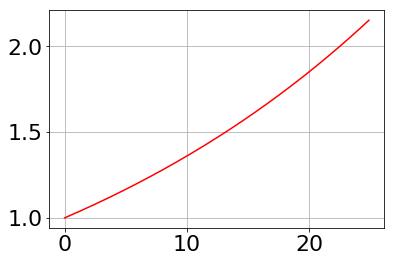

22.6

In [2076]:
time=np.arange(0,25,.1)
fgh = np.exp((gr_matrix[11,0]*24*60**2-gr_sh[0]*24*60**2)*time)
                                          
plt.subplots()
plt.plot(time,fgh,'r')
plt.grid()
plt.show()

np.argwhere(fgh>=2)[0,0]
#2*fgh[200],fgh[242]
#time[10],24*60**2
#time[42]/(24*60**2)*24

time[226]#/(24*60**2)#*24
#24*60**2, 10**5

In [2065]:
gr_matrix[11,0]

9.710178187660473e-06

In [2014]:
fgh

NameError: name 'fgh' is not defined

In [1961]:
#sigmai_sorted_1 = load_growthrates(sigmai_sorted_1,'1')
100*(np.max(sigmai_sorted)*10**(-5)-gr_sh[2])/gr_sh[2],100*(gr_matrix[11,11]-gr_sh[2])/gr_sh[2]#gr_matrix[11,11]
100*(npmaxsigsort_min19-npmaxsigsort_20sharp)/npmaxsigsort_20sharp,100*(npmaxsigsort_max21-npmaxsigsort_20sharp)/npmaxsigsort_20sharp,100*(npmaxsigsort_min20-npmaxsigsort_20sharp)/npmaxsigsort_20sharp,100*(npmaxsigsort_max20-npmaxsigsort_20sharp)/npmaxsigsort_20sharp
np.max(sigmai_sorted)-gr_sh[0]*10**(5)

-0.004529388562137582

In [1900]:
#npmaxsigsort_max21 = np.max(sigmai_sorted)
#npmaxsigsort_min19 = np.max(sigmai_sorted)
#npmaxsigsort_max20 = np.max(sigmai_sorted)
#npmaxsigsort_min20 = np.max(sigmai_sorted)
npmaxsigsort_min19,npmaxsigsort_min20,npmaxsigsort_20sharp,npmaxsigsort_max20,npmaxsigsort_max21

(1.276171010031935,
 1.315202211141394,
 1.3432361223767662,
 1.3689750352317083,
 1.3835748576215232)

In [1401]:
for e in range(len(epsilon1)):
    if sigmai_sorted[e,0,np.argwhere(sigmai_sorted[e,0,:,-1]==np.max(sigmai_sorted[e,0,:,-1]))[0][0],-1] > 10:
        print (sigmai_sorted[e,0,np.argwhere(sigmai_sorted[e,0,:,-1]==np.max(sigmai_sorted[e,0,:,-1]))[0][0],-1])
        sigmai_sorted[e,0,np.argwhere(sigmai_sorted[e,0,:,-1]==np.max(sigmai_sorted[e,0,:,-1]))[0][0],-1] = (sigmai_sorted[e,0,np.argwhere(sigmai_sorted[e,0,:,-1]==np.max(sigmai_sorted[e,0,:,-1]))[0][0]-1,-1]+sigmai_sorted[e,0,np.argwhere(sigmai_sorted[e,0,:,-1]==np.max(sigmai_sorted[e,0,:,-1]))[0][0]+1,-1])/2
        print (sigmai_sorted[e,0,np.argwhere(sigmai_sorted[e,0,:,-1]==np.max(sigmai_sorted[e,0,:,-1]))[0][0],-1])


12.99774728089325
0.9362744820422285


In [1402]:
#eigvecs_sorted = eigvecs_sorted_scaled
#l2l1_sm, S2S1_sm

In [ ]:
#define_tropopause_sensitivity()
plot_tropopause_sensitivity()

In [1425]:
#save_smooth_tropopause_sensitivity()

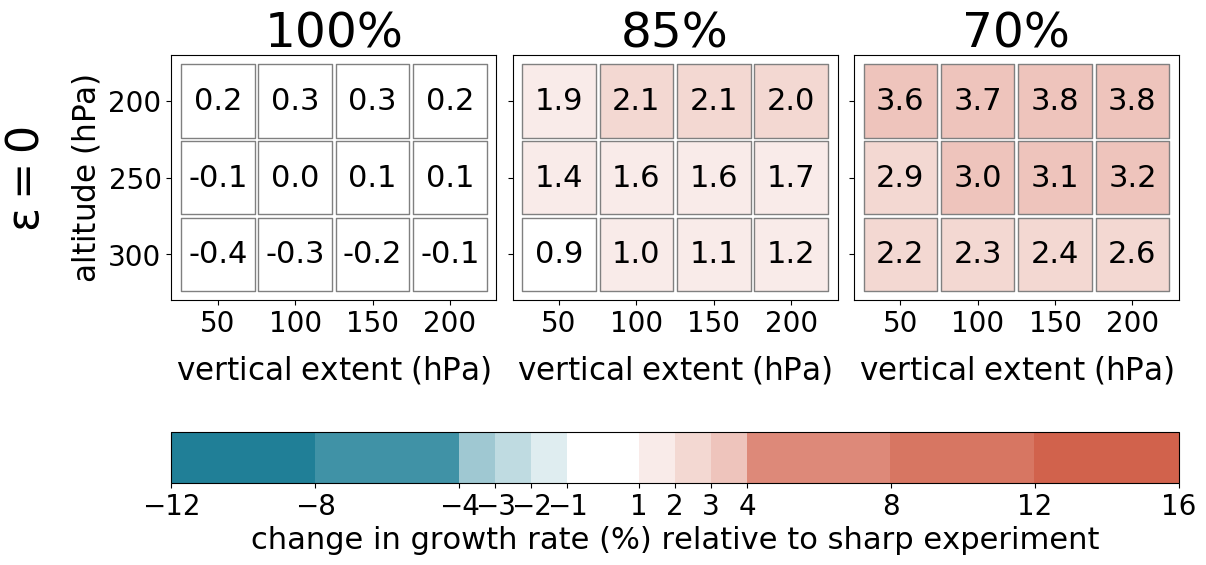

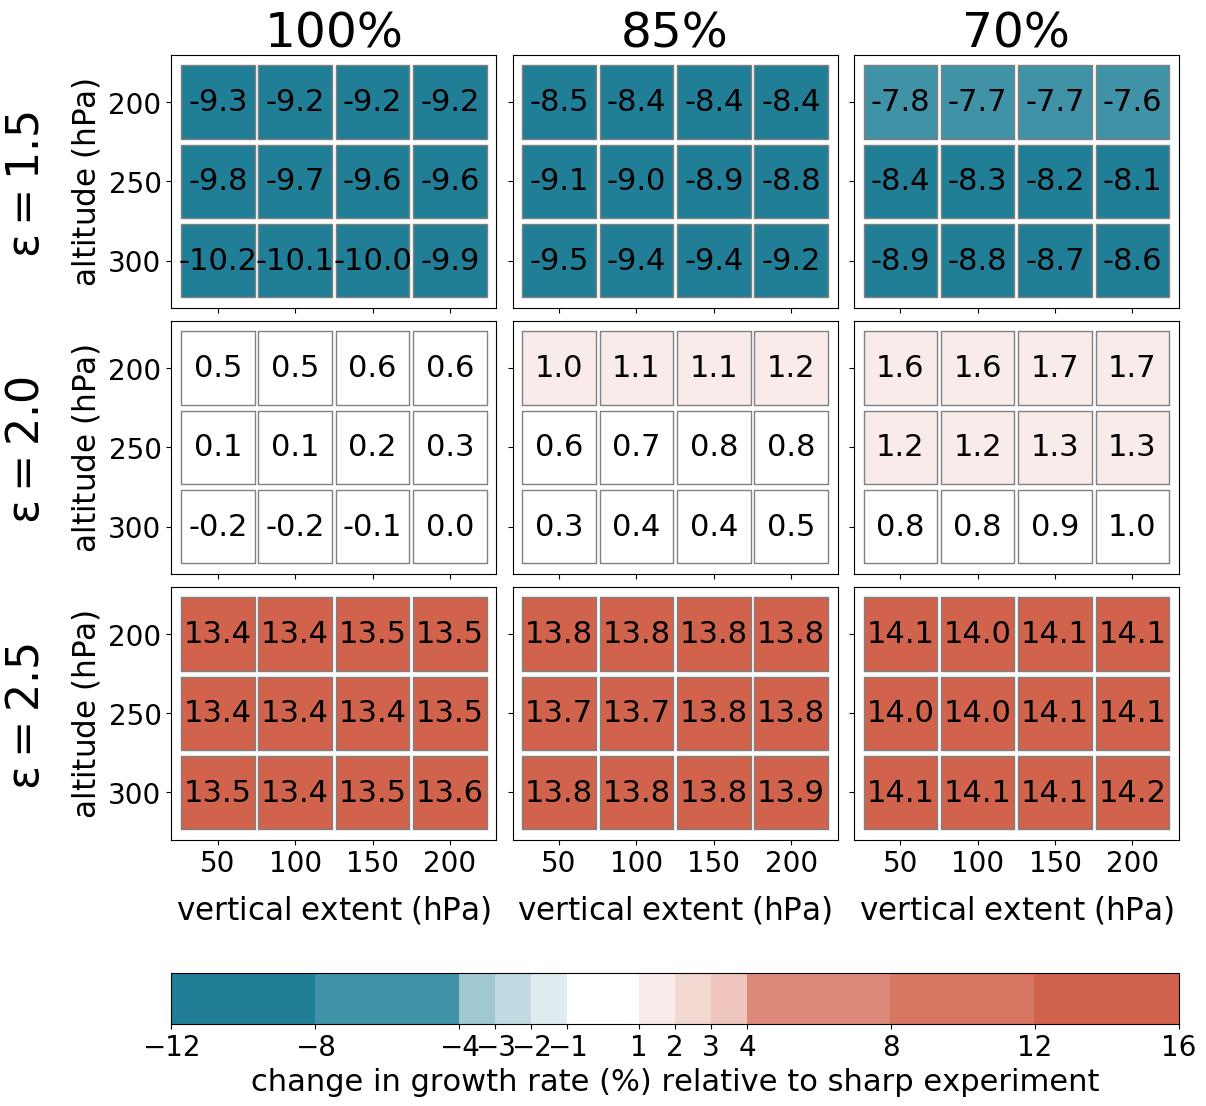

In [1452]:
plot_error_growth_4D_matrix()

In [446]:
#np.savetxt('sigmai_sorted_1.txt',sigmai_sorted_1)

In [860]:
#100*(np.exp((np.nanmax(sigmai_sorted*10**(-5))-np.nanmax(sigmai_sorted_1*10**(-5)))*10*24*60**2)-1)
100*(gr_matrix[10,0]-gr_matrix[2,0])/gr_matrix[2,0],100*(gr_matrix[9,1]-gr_matrix[1,1])/gr_matrix[1,1],100*(gr_matrix[11,1]-gr_matrix[3,1])/gr_matrix[3,1],100*(gr_matrix[10,2]-gr_matrix[2,2])/gr_matrix[2,2]
100*(gr_matrix[10,6]-gr_matrix[2,6])/gr_matrix[2,6],100*(gr_matrix[9,7]-gr_matrix[1,7])/gr_matrix[1,7],100*(gr_matrix[11,7]-gr_matrix[3,7])/gr_matrix[3,7],100*(gr_matrix[10,8]-gr_matrix[2,8])/gr_matrix[2,8]
100*(gr_matrix[2,0]-gr_sh[0])/gr_sh[0],100*(gr_matrix[1,1]-gr_sh[0])/gr_sh[0],100*(gr_matrix[3,1]-gr_sh[0])/gr_sh[0],100*(gr_matrix[2,2]-gr_sh[0])/gr_sh[0]
#100*(gr_matrix[8,8]-gr_sh[2])/gr_sh[2],100*(gr_matrix[11,6]-gr_sh[2])/gr_sh[2]

(0.3129362795903005,
 0.0497222448193772,
 0.09148106143281115,
 -0.2363113823566734)

In [310]:
#np.savetxt('matrix.txt', gr_matrix)#, fmt='%d')
#gr_matrix = np.loadtxt('matrix.txt')
gr_matrix, error_matrix_heating

403.90110475221917

In [24]:
100*(np.max(sigmai_sorted_9)-np.max(sigmai_sorted_8))/np.max(sigmai_sorted_8), 100*(np.max(sigmai_sorted_11)-np.max(sigmai_sorted_10))/np.max(sigmai_sorted_10)

(0.9576136058164096, 1.1160176193519362)

In [1121]:
i=careful
gr_ls[i] = np.nanmax(sigmai_sorted[0,0,:,-1])
wl_ls[i] = wl[np.argwhere(sigmai_sorted[0,0,:,-1] == np.nanmax(sigmai_sorted[0,0,:,-1]))[0][0]]
dq_ls[i] = np.nanmax(dqdy[1:-1])
pdq_ls[i] = p[np.argwhere(dqdy == np.nanmax(dqdy[1:-1]))[0][0]]
cph_ls[i] = sigmar_sorted[0,0,np.argwhere(sigmai_sorted[0,0,:,-1]==np.max(sigmai_sorted[0,0,:,-1]))[-1][0],-1]/(2*np.pi)*wl[i_maxunstab[0,0]]

tot_index = np.argwhere(kx == 2*np.pi)[0][0]
psitrop[i] = np.nanmax(psi[jtrop])
psitropeps[i] = np.max(psi[jtrop+1])
psisurf[i] = np.nanmax(psi[-1])
psitrop_index = np.argwhere(psi[jtrop] == np.nanmax(psi[jtrop]))[0][0]
psisurf_index = np.argwhere(psi[-1] == np.nanmax(psi[-1]))[0][0]
psiphase[i] = (psisurf_index-psitrop_index)*360/tot_index

Ttrop_index = np.argwhere(T[eps1_index,eps2_index,jtrop] == np.max(T[eps1_index,eps2_index,jtrop]))[0][0]
Ttropeps[i] = np.nanmax(T[eps1_index,eps2_index,jtrop+1])
Tsurf[i] = np.nanmax(T[eps1_index,eps2_index,-1])
Ttropeps_index = np.argwhere(T[eps1_index,eps2_index,jtrop+1] == np.nanmax(T[eps1_index,eps2_index,jtrop+1]))[0][0]
Ttropepsup_index = np.argwhere(T[eps1_index,eps2_index,jtrop-1] == np.nanmax(T[eps1_index,eps2_index,jtrop-1]))[0][0]
Tsurf_index = np.argwhere(T[eps1_index,eps2_index,-1] == np.nanmax(T[eps1_index,eps2_index,-1]))[0][0]
Tsurfeps_index = np.argwhere(T[eps1_index,eps2_index,-2] == np.nanmax(T[eps1_index,eps2_index,-2]))[0][0]
Tphase[i] = (Tsurf_index-Ttrop_index)*360/tot_index
Tphaseeps[i] = (Tsurf_index-Ttropeps_index)*360/tot_index
           
PVdzsurf[i] = np.max(T[eps1_index,eps2_index,-1])/S[-1]
PVdztrop[i] = np.max(T[eps1_index,eps2_index,jtrop-1]/S[jtrop-1]-T[eps1_index,eps2_index,jtrop+1]/S[jtrop+1])
PVtrop_index = np.argwhere(T[eps1_index,eps2_index,jtrop-1]/S[jtrop-1]-T[eps1_index,eps2_index,jtrop+1]/S[jtrop+1] == np.max(T[eps1_index,eps2_index,jtrop-1]/S[jtrop-1]-T[eps1_index,eps2_index,jtrop+1]/S[jtrop+1]))[0][0]
PVsurf_index = np.argwhere(T[eps1_index,eps2_index,-1]/S[-1] == np.max(T[eps1_index,eps2_index,-1]/S[-1]))[0][0]
PVphase[i] = (PVsurf_index-PVtrop_index)*360/tot_index

wtrop_index = np.argwhere(w[jtrop] == np.min(w[jtrop]))[0][0]
wtropeps_index = np.argwhere(w[jtrop+1] == np.min(w[jtrop+1]))[0][0]
wsurfeps_index = np.argwhere(w[-2] == np.min(w[-2]))[0][0]
wphase[i] = (wsurfeps_index-wtrop_index)*360/tot_index
     
vtrop_index = np.argwhere(v[jtrop] == np.max(v[jtrop]))[0][0]
vtropeps_index = np.argwhere(v[jtrop+1] == np.nanmax(v[jtrop+1]))[0][0]
vsurf_index = np.argwhere(v[-1] == np.nanmax(v[-1]))[0][0]
Tvtrop[i] = (Ttropeps_index-vtropeps_index)*360/tot_index
Tvsurf[i] = (Tsurf_index-vsurf_index)*360/tot_index
Twtrop[i] = (Ttropeps_index-wtropeps_index)*360/tot_index
Twsurf[i] = (Tsurfeps_index-wsurfeps_index)*360/tot_index

ca[i] = vT[-1]
ca_trop[i] = vT_trop[-1]
vTlevind[i] = np.argwhere(v*T[eps1_index,eps2_index]==np.nanmax(np.min(v[jtrop+1:]*T[eps1_index,eps2_index,jtrop+1:],axis=1)))[0][0]
vTpos[i] = 100*(v*T >= 0).sum()/(v*T < inf).sum()
ce[i] = wT[-1]
ce_trop[i] = wT_trop[-1]
wTpos[i] = 100*(w*T <= 0).sum()/(w*T < inf).sum()
wTpos_trop[i] = 100*(w[jtrop:]*T[eps1_index,eps2_index,jtrop:] <= 0).sum()/(w[jtrop:]*T[eps1_index,eps2_index,jtrop:] < inf).sum()

t_ls = tempcalc(psi_maxunstab)[eps1_index,eps2_index]
v_ls = 1j*k[i_maxunstab[eps1_index,eps2_index]]*psi_maxunstab[eps1_index,eps2_index]
norm_energy_ls[i] = simps(abs(v_ls**2+t_ls**2/S[:nrws]),p[:nrws])
norm_psis_ls[i] = (np.nanmax(psi[:,-1]))

vterm_Tmax_tropdown[i] = v[jtrop+1,Ttropeps_index]*lambda1[jtrop+1]
wterm_Tmax_tropdown[i] = w[jtrop+1,Ttropeps_index]*S[jtrop+1]
uterm_T90_tropdown[i] = u[jtrop+1]*k[i_maxunstab[eps1_index,eps2_index]]*T[eps1_index,eps2_index,jtrop+1,Ttropeps_index]
vterm_T90_tropdown[i] = v[jtrop+1,Ttropeps_index+int((tot_index-1)*1/4)]*lambda1[jtrop+1]
wterm_T90_tropdown[i] = w[jtrop+1,Ttropeps_index+int((tot_index-1)*1/4)]*S[jtrop+1]
vterm_Tmax_tropup[i] = v[jtrop-1,Ttropepsup_index]*lambda1[jtrop-1]
wterm_Tmax_tropup[i] = w[jtrop-1,Ttropepsup_index]*S[jtrop-1]
uterm_T90_tropup[i] = u[jtrop-1]*k[i_maxunstab[eps1_index,eps2_index]]*T[eps1_index,eps2_index,jtrop-1,Ttropepsup_index]
vterm_T90_tropup[i] = v[jtrop-1,Ttropepsup_index+int((tot_index-1)*1/4)]*lambda1[jtrop-1]
wterm_T90_tropup[i] = w[jtrop-1,Ttropepsup_index+int((tot_index-1)*1/4)]*S[jtrop-1]



In [1421]:
i=careful
gr_ls_sm[i] = np.nanmax(sigmai_sorted[0,0,:,-1])
wl_ls_sm[i] = wl[np.argwhere(sigmai_sorted[0,0,:,-1] == np.nanmax(sigmai_sorted[0,0,:,-1]))[0][0]]
dq_ls_sm[i] = np.nanmax(dqdy[1:-1])
dq_int_ls_sm[i] = np.sum(dqdy[1:-1])
pdq_ls_sm[i] = p[np.argwhere(dqdy == np.nanmax(dqdy[1:-1]))[0][0]]
tropindex = np.argwhere(p[:nrws]==pdq_ls[-1])[0][0] # index of new tropopause
cph_ls_sm[i] = sigmar_sorted[0,0,np.argwhere(sigmai_sorted[0,0,:,-1]==np.nanmax(sigmai_sorted[0,0,:,-1]))[-1][0],-1]/(2*np.pi)*wl[i_maxunstab[0,0]]
smoothrangemin = np.argwhere(100*dqdy[1:-2]/np.nanmax(dqdy[1:-2])>=1)[0][0]+1
smoothrangemax = np.argwhere(100*dqdy[1:-2]/np.nanmax(dqdy[1:-2])>=1)[-1][0]+1
psmoothrangemin[i] = p[smoothrangemin]
psmoothrangemax[i] = p[smoothrangemax]

tot_index = np.argwhere(kx == 2*np.pi)[0][0]
psitrop_sm[i] = np.nanmax(psi[tropindex])
psisurf_sm[i] = np.nanmax(psi[-1])
psitrop_index = np.argwhere(psi[tropindex] == np.nanmax(psi[tropindex]))[0][0]
psisurf_index = np.argwhere(psi[-1] == np.nanmax(psi[-1]))[0][0]
psiphase_sm[i] = (psisurf_index-psitrop_index)*360/tot_index
Ttropeps_sm[i] = np.nanmax(T[eps1_index,eps2_index,tropindex+1])
Ttroprange_sm[i] = np.nanmax(T[eps1_index,eps2_index,tropindex:smoothrangemax])
Tsurf_sm[i] = np.nanmax(T[eps1_index,eps2_index,-1])
Ttropeps_index = np.argwhere(T[eps1_index,eps2_index,tropindex+1] == np.nanmax(T[eps1_index,eps2_index,tropindex+1]))[0][0]
Tsurf_index = np.argwhere(T[eps1_index,eps2_index,-1] == np.nanmax(T[eps1_index,eps2_index,-1]))[0][0]
Tsurfeps_index = np.argwhere(T[eps1_index,eps2_index,-2] == np.nanmax(T[eps1_index,eps2_index,-2]))[0][0]
Tphase_sm[i] = (Tsurf_index-Ttropeps_index)*360/tot_index
PVtrop_sm[i] = np.nanmax(PV_u[eps1_index, eps2_index,tropindex])
PVsurf_sm[i] = np.nanmax(PV_u[eps1_index, eps2_index,-1])
#PVtrop_index = np.argwhere(T[eps1_index,eps2_index,tropindex-1]/S[tropindex-1]-T[eps1_index,eps2_index,tropindex+1]/S[tropindex+1] == np.nanmax(T[eps1_index,eps2_index,tropindex-1]/S[tropindex-1]-T[eps1_index,eps2_index,tropindex+1]/S[tropindex+1]))[0][0]
#PVsurf_index = np.argwhere(T[eps1_index,eps2_index,-1]/S[-1] == np.nanmax(T[eps1_index,eps2_index,-1]/S[-1]))[0][0]
PVtrop_index = np.argwhere(PV_u[eps1_index, eps2_index,tropindex] == np.nanmax(PV_u[eps1_index, eps2_index,tropindex]))[0][0]
PVsurf_index = np.argwhere(PV_u[eps1_index, eps2_index,-1] == np.nanmax(PV_u[eps1_index, eps2_index,-1]))[0][0]
PVphase_sm[i] = (PVsurf_index-PVtrop_index)*360/tot_index
wtropeps_index = np.argwhere(w[tropindex+1] == np.min(w[tropindex+1]))[0][0]
wsurf_index = np.argwhere(w[-1] == np.min(w[-1]))[0][0]
wsurfeps_index = np.argwhere(w[-2] == np.min(w[-2]))[0][0]
wphase_sm[i] = (wsurf_index-wtropeps_index)*360/tot_index

vtropeps_index = np.argwhere(v[tropindex+1] == np.nanmax(v[tropindex+1]))[0][0]
vsurf_index = np.argwhere(v[-1] == np.nanmax(v[-1]))[0][0]
Tvtrop_sm[i] = (Ttropeps_index-vtropeps_index)*360/tot_index
Tvsurf_sm[i] = (Tsurf_index-vsurf_index)*360/tot_index
Twtrop_sm[i] = (Ttropeps_index-wtropeps_index)*360/tot_index
Twsurf_sm[i] = (Tsurfeps_index-wsurfeps_index)*360/tot_index

ca_sm[i] = vT[-1]
ca_trop_sm[i] = vT_trop[-1]
vTlevind_sm[i] = np.argwhere(v*T[eps1_index,eps2_index]==np.nanmax(np.min(v[tropindex+1:]*T[eps1_index,eps2_index,tropindex+1:],axis=1)))[0][0]
vTpos_sm[i] = 100*(v*T >= 0).sum()/(v*T < inf).sum()
ce_sm[i] = wT[-1]
ce_trop_sm[i] = wT_trop[-1]
wTpos_sm[i] = 100*(w*T <= 0).sum()/(w*T < inf).sum()
wTpos_trop_sm[i] = 100*(w[tropindex+1:]*T[eps1_index,eps2_index,tropindex+1:] <= 0).sum()/(w[tropindex+1:]*T[eps1_index,eps2_index,tropindex+1:] < inf).sum()

t_sm = tempcalc(psi_maxunstab)[eps1_index,eps2_index]
v_sm = 1j*k[i_maxunstab[eps1_index,eps2_index]]*psi_maxunstab[eps1_index,eps2_index]
norm_energy_ls_sm[i] = simps(abs(v_sm**2+t_sm**2/S[:nrws]),p[:nrws])
norm_psis_ls_sm[i] = (np.nanmax(psi[:,-1]))

vterm_Tmax_tropeps_sm[i] = v[tropindex+1,Ttropeps_index]*lambda1[tropindex+1]
wterm_Tmax_tropeps_sm[i] = w[tropindex+1,Ttropeps_index]*S[tropindex+1]
uterm_T90_tropeps_sm[i] = u[tropindex+1]*k[i_maxunstab[eps1_index,eps2_index]]*T[eps1_index,eps2_index,tropindex+1,Ttropeps_index]
vterm_T90_tropeps_sm[i] = v[tropindex+1,Ttropeps_index+int((tot_index-1)*1/4)]*lambda1[tropindex+1]
wterm_T90_tropeps_sm[i] = w[tropindex+1,Ttropeps_index+int((tot_index-1)*1/4)]*S[tropindex+1]

----------------------------------------------------------------------------

In [4]:
%run -i 'trajectories.py'
y_expand_fields()
define_cyclone_area()
if heating1 == True or heating2 == True:
    define_wcb_and_sfl()
#print (hpy().heap())
#manual_coord()

3D flow field


growth rate factor one day back in time is 0.35229108235740086
max surface psi: 5.99 10^6 m^2/s; max surface v: 15.00 m/s; mean w: 1.30 10^-3 hPa/s


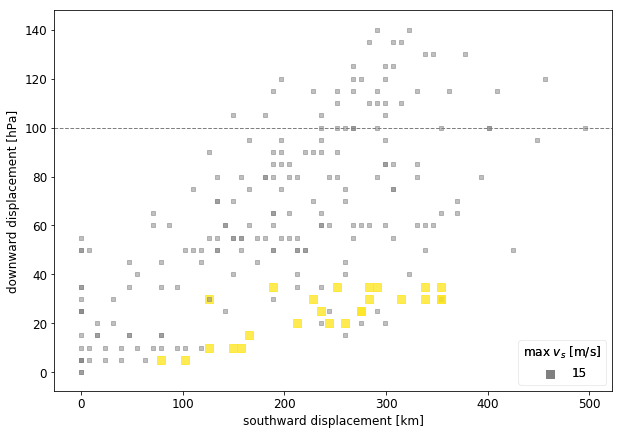

Average dQ: -0.000211, which is -1.68e+02 % of total heating, and means a change from epsilon 12.5 to -8.47


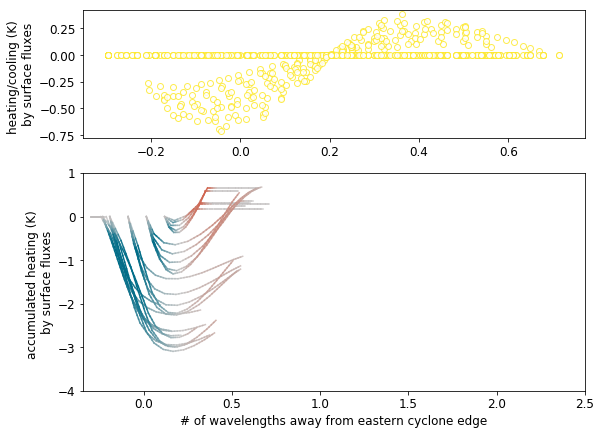

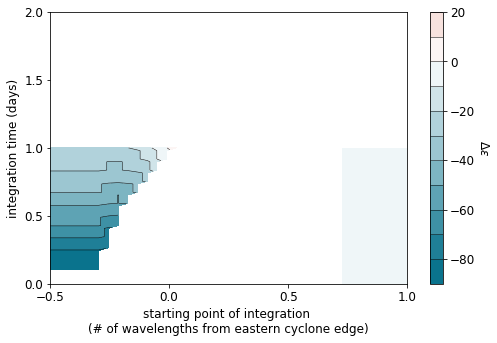

0.0


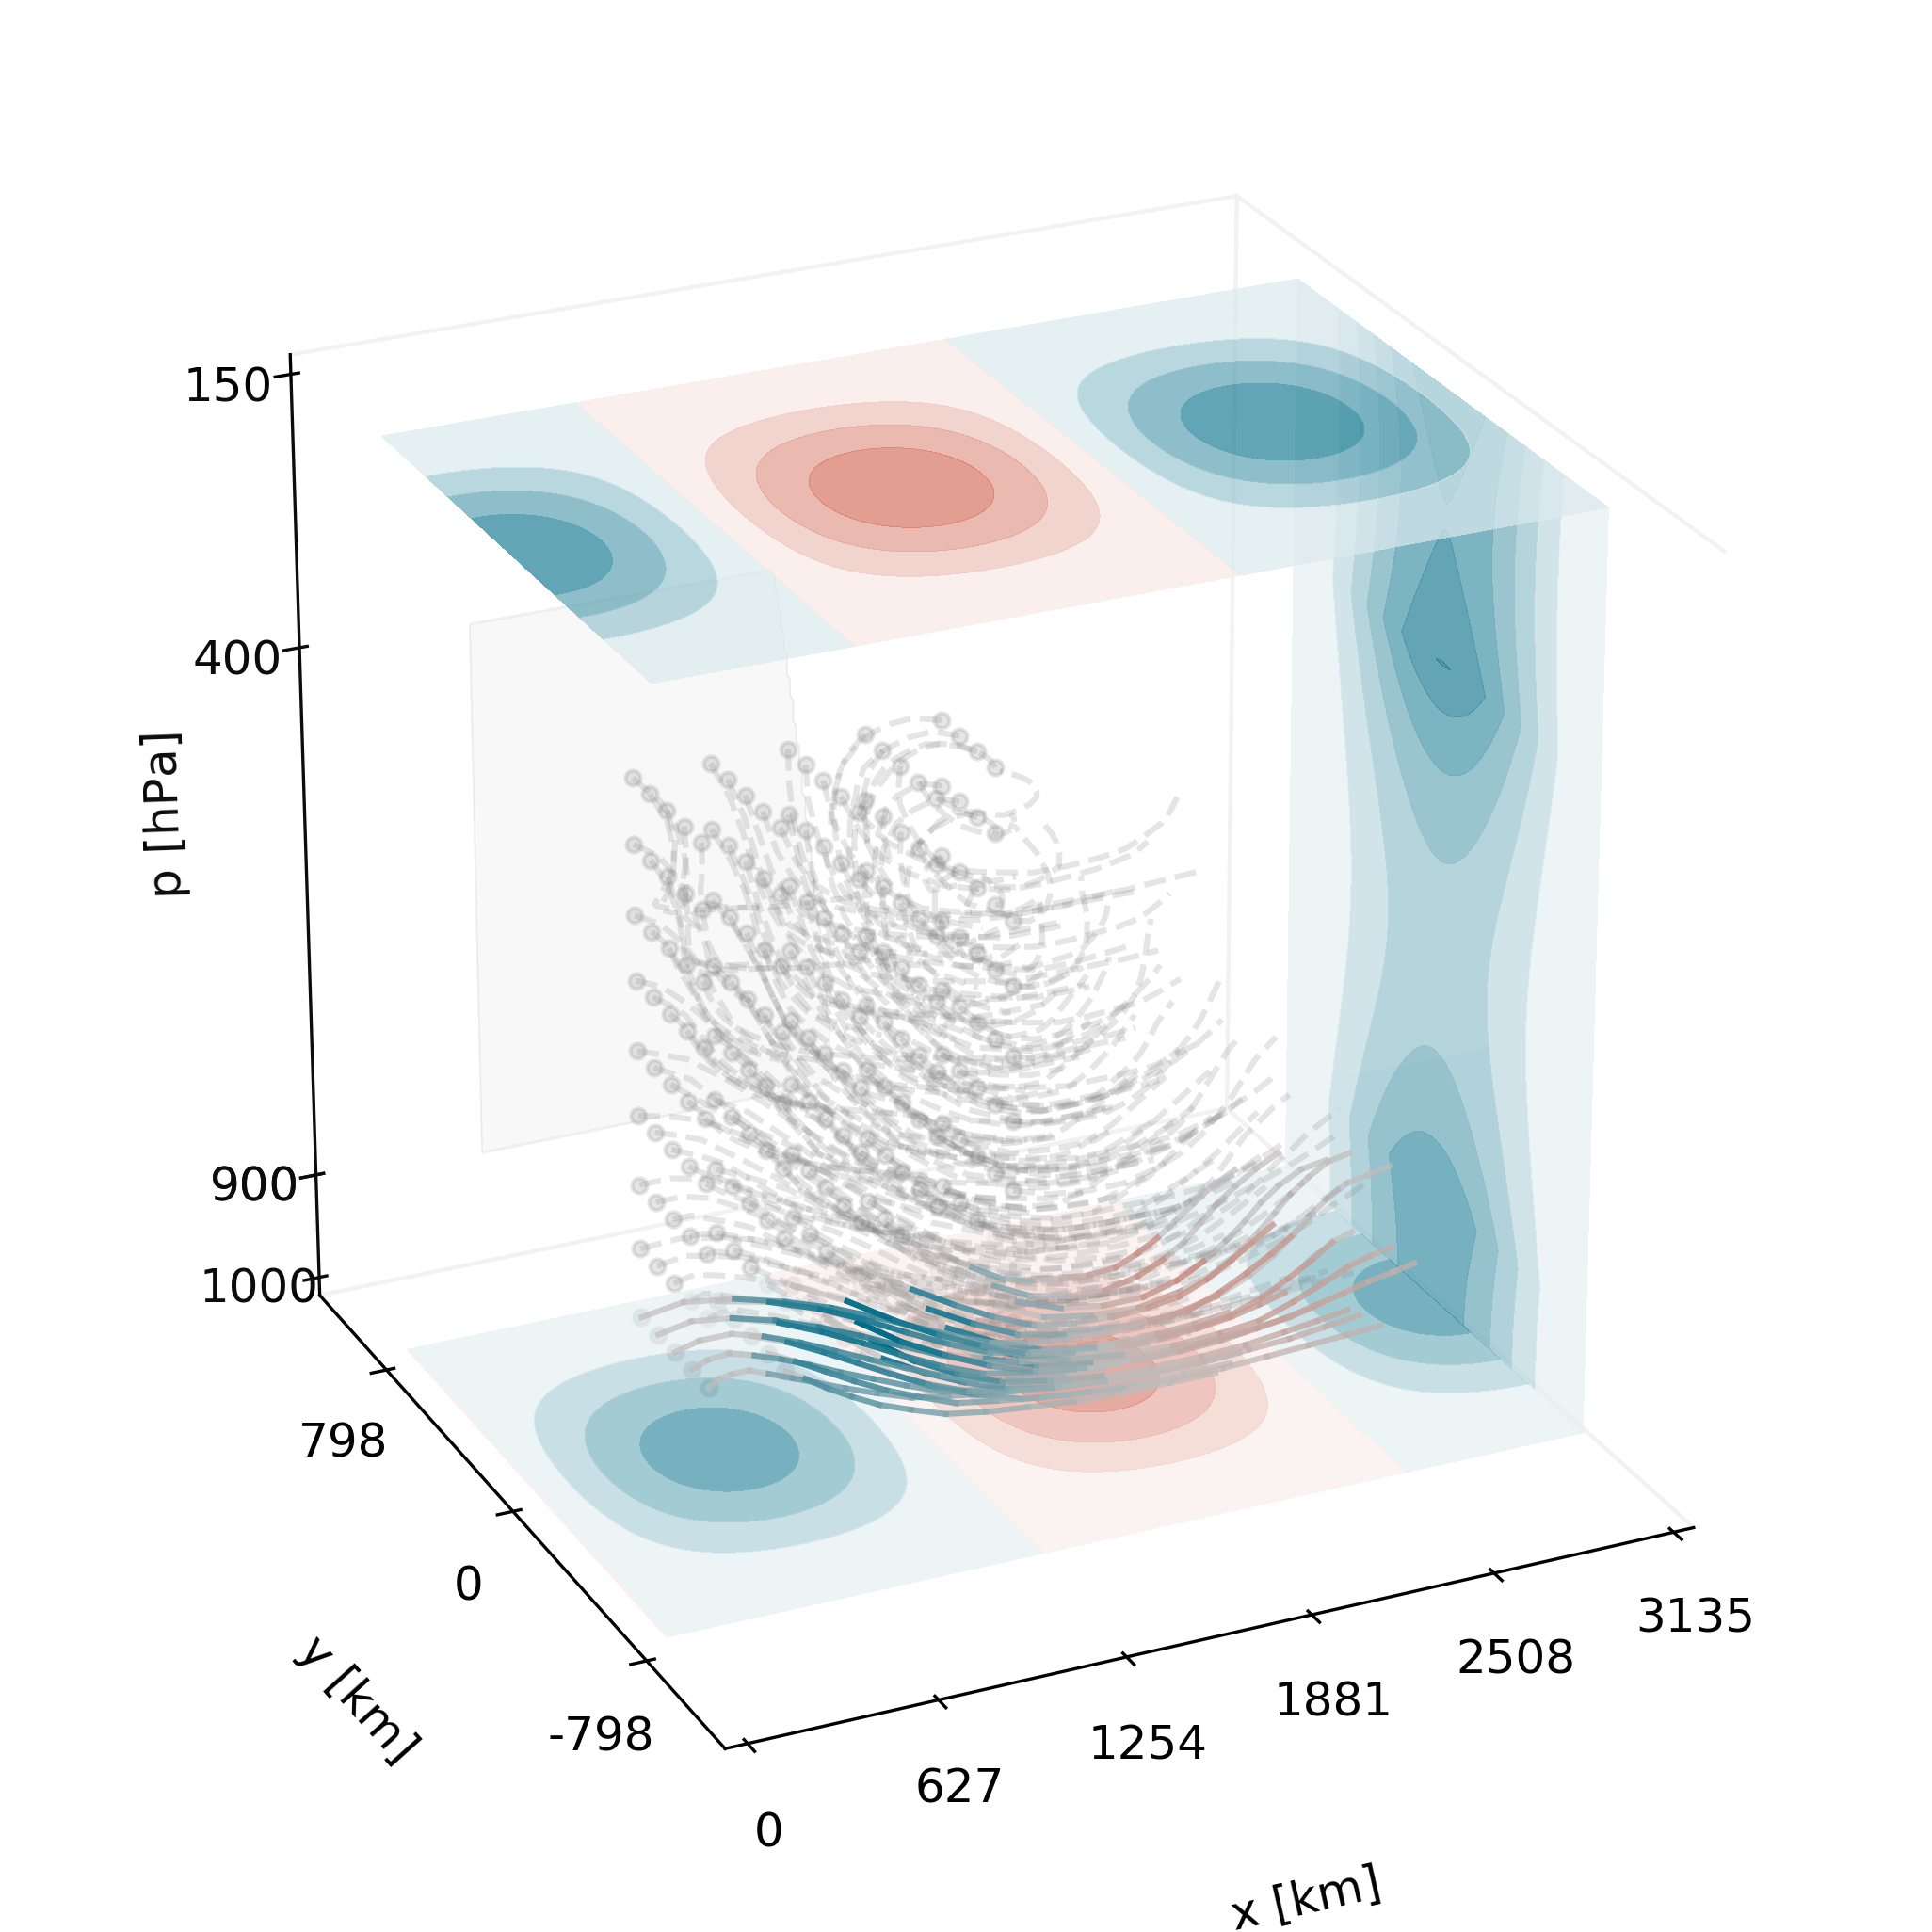

25 out of 36 trajectories touch surface flux layer before warm conveyor belt


<Figure size 432x288 with 0 Axes>

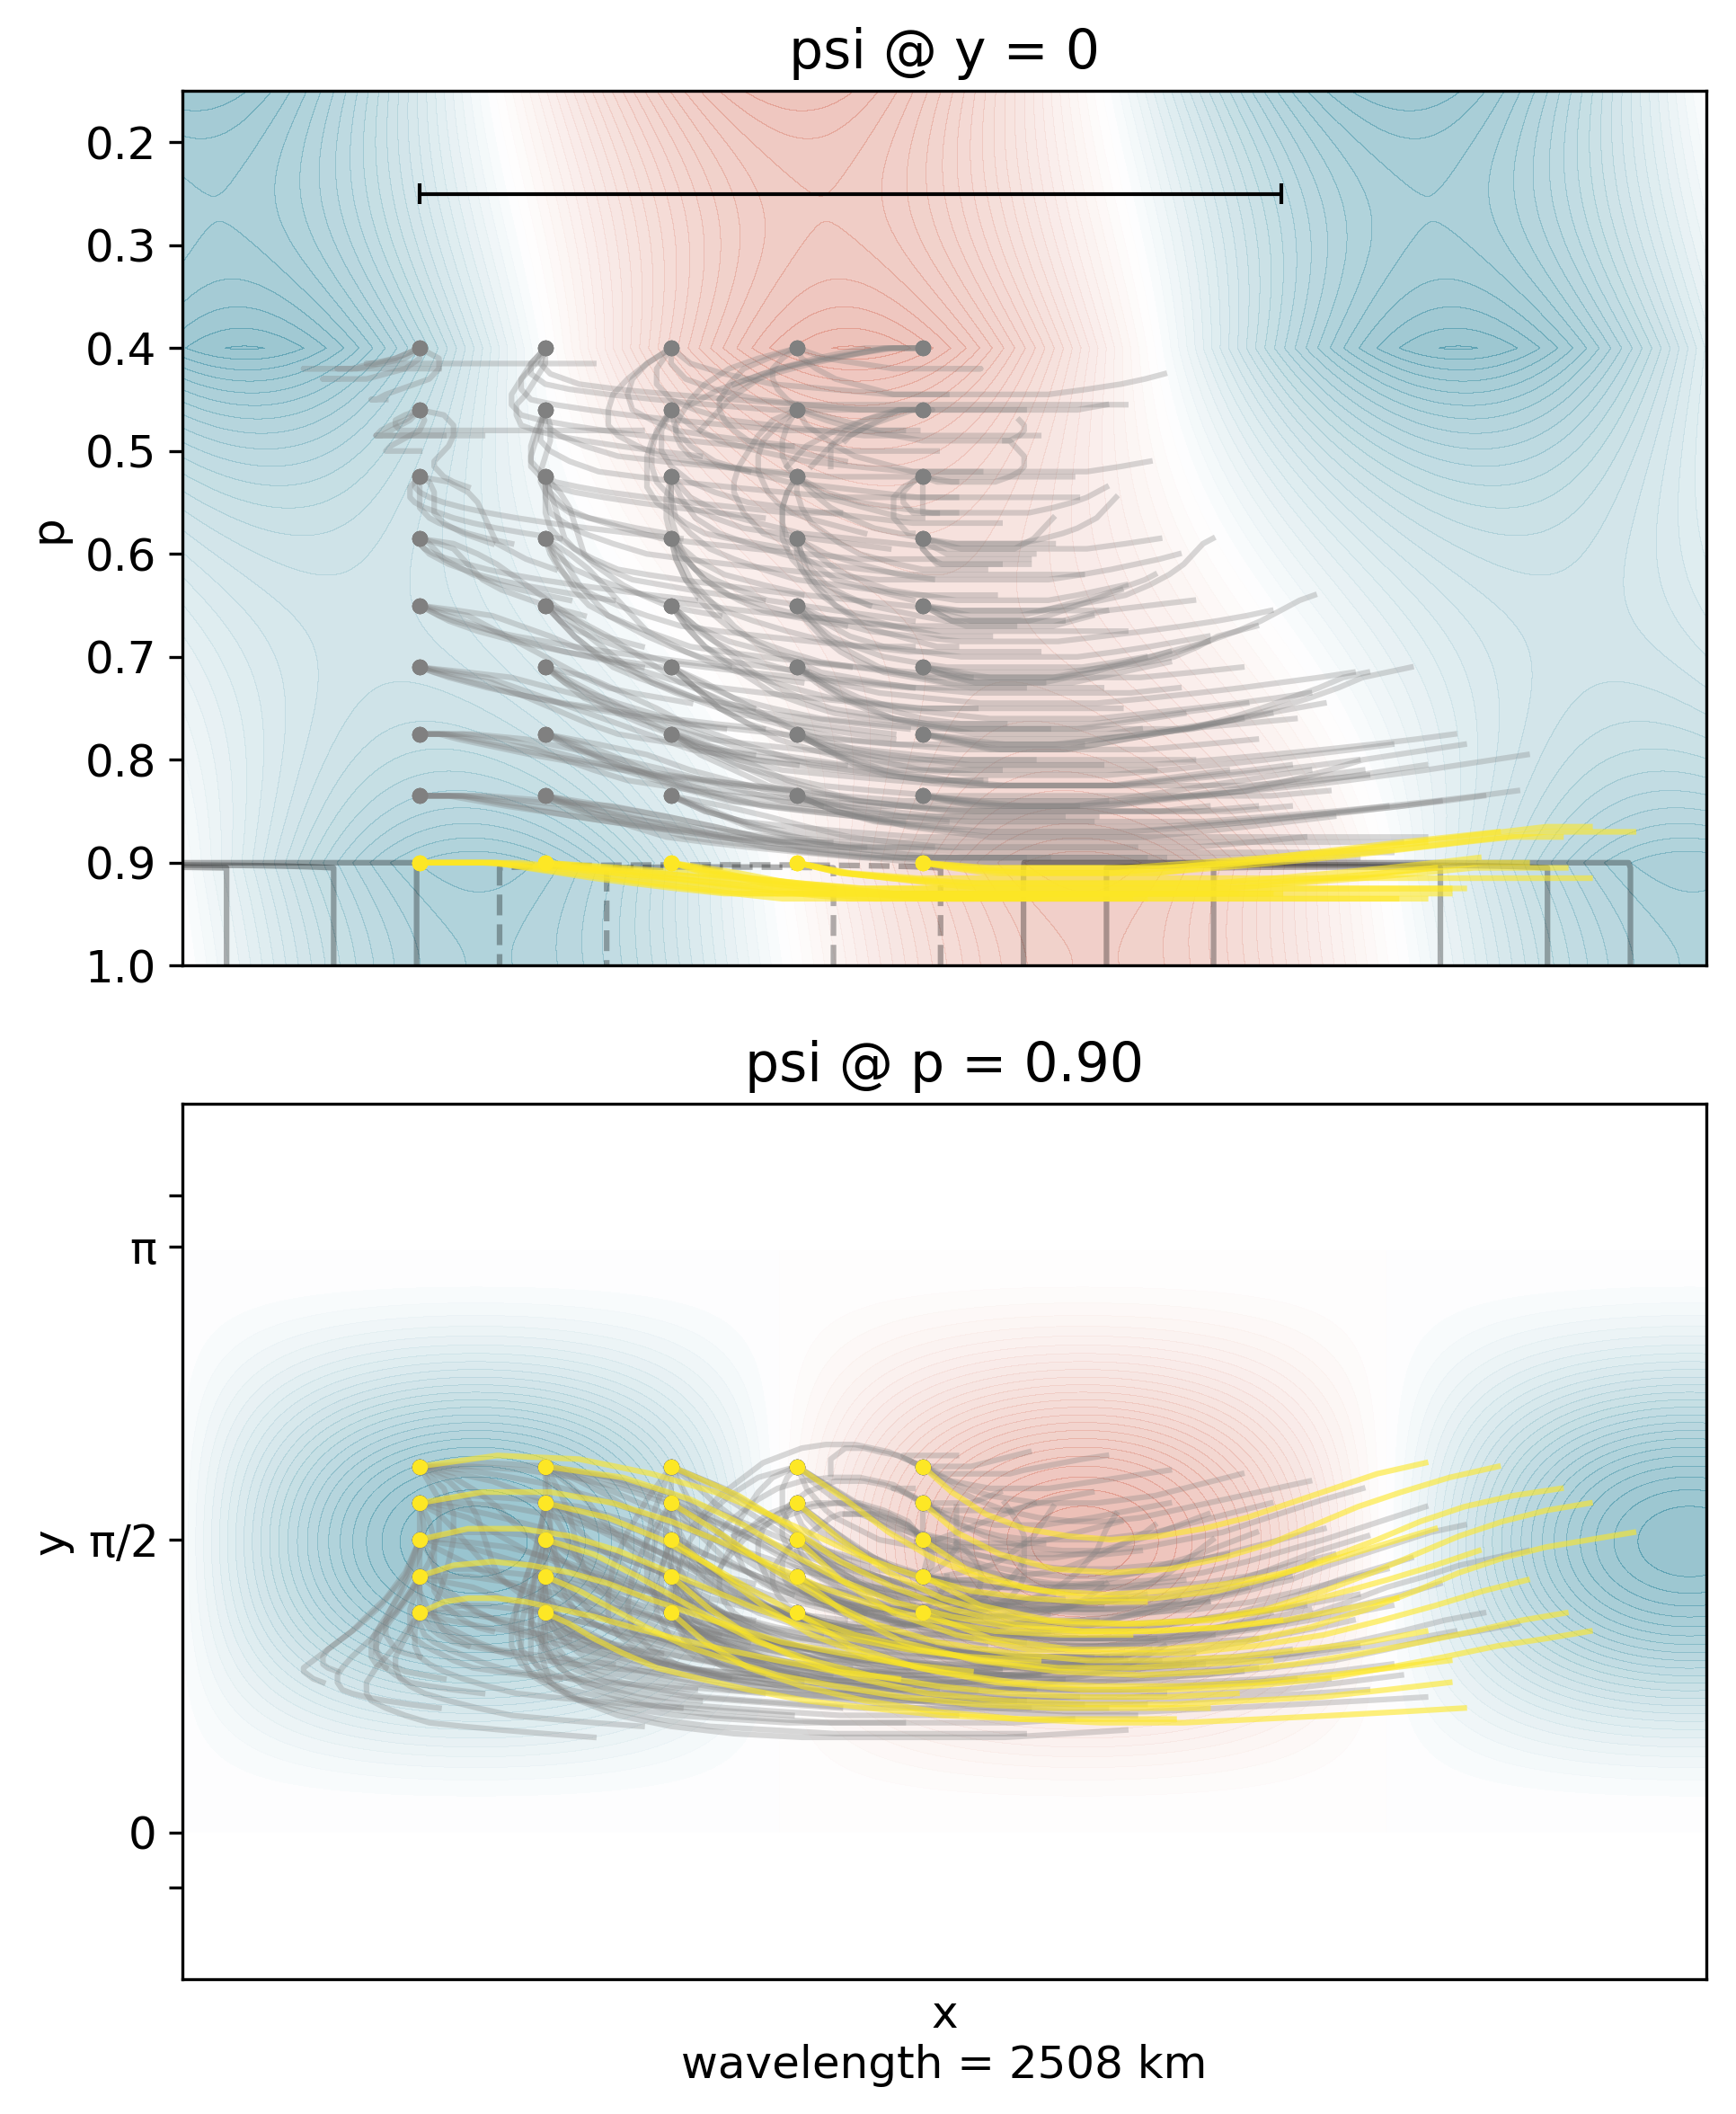

In [50]:
%run -i 'trajectories.py'
vref = 0.0015 # 0.0010 ~ 10 m/s
#wref = 0.0005 # 5*10^-3 hPa/s
define_starting_coordinates()
calculate_trajectories()
prepare_trajectory_plot()
if heating1 == True or heating2 == True:
    trajectories_in_wcb_and_sfl()
find_and_plot_trajectory_distance()
integrate_sfl()
#print (hpy().heap())
#%matplotlib notebook
plot_trajectories_3D()
plot_trajectories_2D()

3D flow field


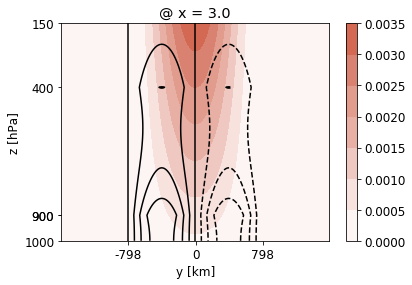

In [95]:
%run -i 'trajectories.py'
np.shape(u3d[0,:,:]),np.shape(utr3d[:,:]), (v3d[0,:,0])
y_expand_fields()
plot_ubar()